# **Prediction using Supervised ML : Task 1**

 ## **Aim : Predict the percentage of an student based the no. of study hours.**

# **Import Libraries :**

In [ ]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Dataset Loading :**

In [ ]:
# importing data from given link:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


# **Dataset First View :**

In [ ]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# **Dataset Rows & Columns count :**

In [ ]:
data.shape

(25, 2)

# **Dataset Information :**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# **Duplicate Values :**

In [ ]:
# Dataset Duplicate Value Count
len(data[data.duplicated()])

0

# **Missing Values/Null Values :**

In [ ]:
# Missing Values/Null Values Count
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# **Dataset's statistical properties :**

In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### lets see any relationship between our data by plotting graph :

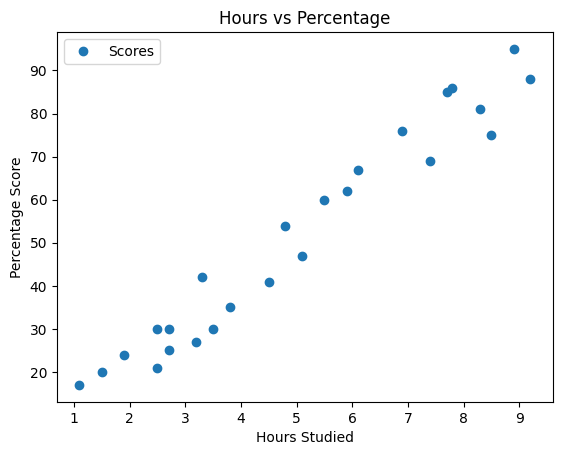

In [ ]:
# plotting distribution of scores :
data.plot(x = 'Hours', y = 'Scores', style = 'o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

### With the help of scatter plot graph we can clearly see that there is a positive linear relation between the number of of hours studied and percentage of scores.

# **Preparing the data :**

In [ ]:
# Dividing data into feature and target :
X = data.drop('Scores', axis = 1)
y = data['Scores']

# **Splitting data :**

In [ ]:
# splitting data into train and test :
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

# **Training the Model :**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# **Plotting the Regression Line :**

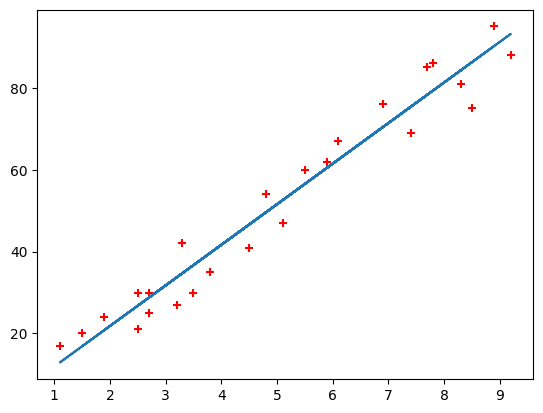

In [ ]:
# plotting the regression line :
line = regressor.coef_*X+regressor.intercept_

# plotting for test data
plt.scatter(X,y, marker = '+', color = 'red')
plt.plot(X, line);
plt.show()

# **Predictiong percentage of students :**

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

# **Comparing Actual Value with Predicted Value :**

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [ ]:
# prediction score if student studies for 9.25 Hrs/Day
hrs = 9.25
hrs_df = pd.DataFrame({'Hours': [hrs]})
pred = regressor.predict(hrs_df)
print('No of Hours = {}'.format(hrs))
print('Predicted Score = {}'.format(pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


## So, according to our model's prediction, a student who studies for 9.25 hours per day can score approximately 93.69 percent.








# **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:',
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982


# **Accuracy of Model :**

In [ ]:
regressor.score(X_test, y_test)

0.9454906892105354

# **Thank You**